## Задание X

In [1]:
# импортируем модули
import matplotlib.pyplot as plt
import numpy as np
# размер фигуры matplotlib по-умолчанию
plt.rcParams['figure.figsize'] = [13, 8]

### Загружаем трейсы

In [2]:
textin = np.load('traces/textin.npy')
textout = np.load('traces/textout.npy')
traces = np.load('traces/traces.npy')
print(np.shape(textin))
print(textin[0])
print(textin[1])

(100, 16)
[156 135   7 127 141 111 213 234 169 189 200 111 126 215 234 164]
[126  27 171  96 137 164  70  37  13 155 105 103 197  87  33 147]


In [3]:
ntraces = np.shape(traces)[0]
nsamples = np.shape(traces)[1]
print(np.shape(traces))
print(ntraces,nsamples)

(100, 5000)
100 5000


Рисуем несколько, чтобы проверить выравнивание:

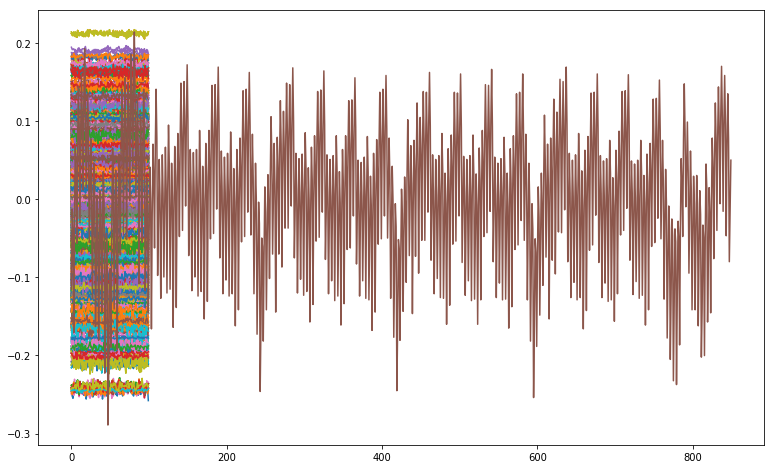

In [11]:
start = 850
end =1700
# for i in range(ntraces):
#    plt.plot(traces[i][start:end], linewidth=.3)
plt.plot(traces[1][start:end])
plt.show()

In [5]:
# Hemming Weight
hw = [bin(n).count("1") for n in range(0,256)]

# AES SBox
sbox = (
0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

# Leakage function
def leakage(data, key_guess):
    return hw[sbox[data ^ key_guess]]

**TODO: написать имлементацию корреляции замеров из трейсов в каждый момент времени с hypothesis**: наша гипотеза как выглядел бы график потребления питания при данном ключе. Должна возвращать максимальный коэффициент корреляции. Можете использовать:
* https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.corrcoef.html

In [6]:
#samples = np.copy(traces[:,901])
#samples

In [12]:
def correlation(hypothesis):   
    max_correlation=0.0
    max_correlation_time=start    
    for timemoment in range(start, end):
        samples = np.copy(traces[:,timemoment])
        
        correlation=abs(np.corrcoef(hypothesis, samples)[1,0])
        if correlation>max_correlation:
            max_correlation_time=timemoment
            max_correlation=correlation
            #max_samples=np.copy(samples)
               
    return max_correlation,max_correlation_time
    #raise RuntimeError("Not implemented")

CPA атака:

In [13]:
def key_guesses_text(coefs, n=3):
    best_guesses = np.argsort(coefs)[::-1][:n]
    desc = []
    tmpl = "key guess: %02x (%06f)" 
    for guess in np.nditer(best_guesses):
        desc.insert(0, tmpl % (guess, coefs[guess]))
    return ", ".join(desc)

key = np.zeros(16)
# for each key byte
for key_byte_num in range(16):
    maxcpa = np.zeros(256)
    maxtime=np.zeros(256)
    # for each key guess at key_byte_num place
    for key_guess in range(0, 256):
        # calculate leakage for data on each trace
        hyp = np.zeros(ntraces)
        for tnum in range(ntraces):
            hyp[tnum] = leakage(textin[tnum][key_byte_num], key_guess)
        [corr, timemoment] = correlation(hyp)
        maxcpa[key_guess] = corr
        maxtime[key_guess]=timemoment
    key[key_byte_num] = np.argmax(maxcpa)
    print("Time: %d Position #%02d: %s" % (maxtime[np.argmax(maxcpa)], key_byte_num, key_guesses_text(maxcpa)))

Time: 954 Position #00: key guess: 4e (0.895379), key guess: a5 (0.489897), key guess: a3 (0.444138)
Time: 1129 Position #01: key guess: 30 (0.842721), key guess: 3b (0.428834), key guess: b0 (0.414979)
Time: 1306 Position #02: key guess: 5f (0.894691), key guess: 95 (0.448951), key guess: fd (0.438338)
Time: 1482 Position #03: key guess: 47 (0.857788), key guess: fd (0.421860), key guess: 8e (0.416280)
Time: 994 Position #04: key guess: 75 (0.886301), key guess: 38 (0.474158), key guess: 66 (0.434587)
Time: 1686 Position #05: key guess: 54 (0.873932), key guess: 0a (0.418044), key guess: c9 (0.399801)
Time: 1346 Position #06: key guess: 35 (0.908848), key guess: 62 (0.454035), key guess: 88 (0.445918)
Time: 1521 Position #07: key guess: 5f (0.871757), key guess: cd (0.449280), key guess: 0d (0.441875)
Time: 1033 Position #08: key guess: 4e (0.863442), key guess: 0e (0.415277), key guess: aa (0.412793)
Time: 1210 Position #09: key guess: 6f (0.833466), key guess: 9e (0.426010), key gue

Position #00: key guess: 4e (0.895379), key guess: a5 (0.489897), key guess: a3 (0.444138)
Position #01: key guess: 30 (0.842721), key guess: 3b (0.428834), key guess: b0 (0.414979)
Position #02: key guess: 5f (0.894691), key guess: 95 (0.448951), key guess: fd (0.438338)
Position #03: key guess: 47 (0.857788), key guess: fd (0.421860), key guess: 8e (0.416280)
Position #04: key guess: 75 (0.886301), key guess: 38 (0.474158), key guess: 66 (0.434587)
Position #05: key guess: 54 (0.873932), key guess: 0a (0.418044), key guess: c9 (0.399801)
Position #06: key guess: 35 (0.908848), key guess: 62 (0.454035), key guess: 88 (0.445918)
Position #07: key guess: 5f (0.871757), key guess: cd (0.449280), key guess: 0d (0.441875)
Position #08: key guess: 4e (0.863442), key guess: 0e (0.415277), key guess: aa (0.412793)
Position #09: key guess: 6f (0.833466), key guess: 9e (0.426010), key guess: 0d (0.420501)
Position #10: key guess: 5f (0.899747), key guess: c6 (0.427388), key guess: d4 (0.426429)
Position #11: key guess: 53 (0.886950), key guess: 6c (0.442573), key guess: 47 (0.434635)
Position #12: key guess: 37 (0.872134), key guess: d2 (0.447741), key guess: 82 (0.417365)
Position #13: key guess: 30 (0.869233), key guess: a0 (0.466711), key guess: 4b (0.442340)
Position #14: key guess: 52 (0.826963), key guess: 12 (0.474275), key guess: 89 (0.440442)
Position #15: key guess: 59 (0.805593), key guess: cc (0.442892), key guess: 9b (0.420123)

Position #00: key guess: 4e (0.895379), key guess: a3 (0.444138), key guess: b3 (0.434705)
Position #01: key guess: 3b (0.428834), key guess: 03 (0.392388), key guess: 05 (0.388330)
Position #02: key guess: fd (0.438338), key guess: c0 (0.426381), key guess: 8c (0.417684)
Position #03: key guess: cf (0.412732), key guess: c8 (0.406857), key guess: a7 (0.406163)
Position #04: key guess: 75 (0.886301), key guess: 38 (0.474158), key guess: e5 (0.429662)
Position #05: key guess: 0a (0.418044), key guess: 15 (0.393954), key guess: 2c (0.389010)
Position #06: key guess: cb (0.438616), key guess: ab (0.430773), key guess: 0d (0.407978)
Position #07: key guess: 9a (0.386487), key guess: 14 (0.384739), key guess: c6 (0.366060)
Position #08: key guess: 4e (0.863442), key guess: 0e (0.415277), key guess: eb (0.397610)
Position #09: key guess: 9e (0.426010), key guess: 01 (0.402914), key guess: 75 (0.398006)
Position #10: key guess: d4 (0.426429), key guess: 0f (0.419965), key guess: bd (0.405662)
Position #11: key guess: c8 (0.381603), key guess: 5b (0.373595), key guess: 4d (0.373206)
Position #12: key guess: 37 (0.872134), key guess: d2 (0.447741), key guess: 82 (0.417365)
Position #13: key guess: 0f (0.427027), key guess: a8 (0.404304), key guess: 31 (0.403238)
Position #14: key guess: 3c (0.400859), key guess: b8 (0.380660), key guess: 53 (0.370524)
Position #15: key guess: cc (0.442892), key guess: 4c (0.417927), key guess: 1e (0.410545)

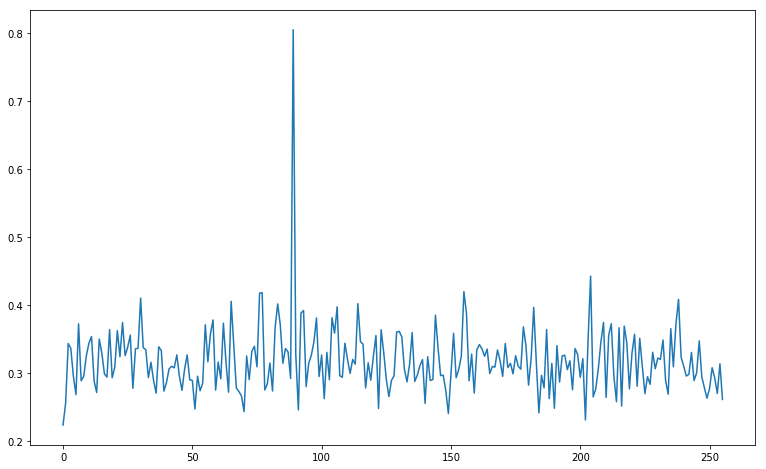

b'N0_GuT5_No_S70RY'


In [14]:
plt.plot(maxcpa)
plt.show()
np.save('traces/key.npy',key)
key1=np.load('traces/key.npy')
key2=key1.astype('B')
key3=key2.tobytes()
key4=key3
key4
print (bytes(key4))
#key4=b'\x4e\x3b\xfd\xcf\x75\x0a\xcb\x9a\x4e\x9e\xd4\xc8\x37\x0f\x3c\xcc'

**TODO: написать функцию проверки найденного ключа: сделать операцию шифрования и сравнить полученный шифротекст с шифротекстом из файла.** Можете использовать:
* https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.astype.html
* https://www.pycryptodome.org/en/latest/src/cipher/aes.html

In [50]:
#import sys
#sys.version
#sys.version_info

In [49]:
# Install a pip package in the current Jupyter kernel

#import sys
#!{sys.executable} -m pip install numpy pycryptodome --no-use-wheel

In [15]:
from Crypto.Cipher import AES
key_found=b'N0_GuT5_No_S70RY'
cipher = AES.new(key_found, AES.MODE_ECB)
cipher2 = AES.new(key4, AES.MODE_ECB)

for TextNumber in range(ntraces):
    intext0=textin[TextNumber]
    intext1=intext0.astype('B')
    intext2=intext1.tobytes()
    encrypted_text = cipher2.encrypt(intext2)
    outtext0=textout[TextNumber]
    outtext1=outtext0.astype('B')
    outtext2=outtext1.tobytes()
    print(outtext2, encrypted_text)
    
"""intext0=textin[0]
intext1=intext0.astype('B')
intext2=intext1.tobytes()
encrypted_text = cipher2.encrypt(intext2)
outtext0=textout[0]
outtext1=outtext0.astype('B')
outtext2=outtext1.tobytes()
print(outtext2, encrypted_text)"""


b'\xb3e<\x05i\xec\xb1\x8a\x83\xc8\x91\n\xcax%R' b'\xb3e<\x05i\xec\xb1\x8a\x83\xc8\x91\n\xcax%R'
b'\x86e\xff\xf5\xf6\xc0.6\x81\xed\x8e\xde)\xad\x06\xb6' b'\x86e\xff\xf5\xf6\xc0.6\x81\xed\x8e\xde)\xad\x06\xb6'
b'd\x85\x0e\xe1Z\x92P\xaf\xb3aN\x8fGQ\xb8\x8d' b'd\x85\x0e\xe1Z\x92P\xaf\xb3aN\x8fGQ\xb8\x8d'
b'\xe3\x98\x9f\xcb\xe6\xdc\xa5\xbdO:\xb3\x8eUr\xa3\x89' b'\xe3\x98\x9f\xcb\xe6\xdc\xa5\xbdO:\xb3\x8eUr\xa3\x89'
b'\x18\x08;1\xafC\x15\xfaVm\x8e\xf3}\xa1\x16\x18' b'\x18\x08;1\xafC\x15\xfaVm\x8e\xf3}\xa1\x16\x18'
b'\x07\x88\xe0|\x86\xdd\xb1\x107\xc9\xc4F\x9cY |' b'\x07\x88\xe0|\x86\xdd\xb1\x107\xc9\xc4F\x9cY |'
b'\x8e%k0\xd6\x83~\x9e\xf7\xd3\x0cb\xa0B\x0e\x13' b'\x8e%k0\xd6\x83~\x9e\xf7\xd3\x0cb\xa0B\x0e\x13'
b'\xc2\xcfGU\x07i\xc6\x14~\x15g\x8cq\xb3K\xa7' b'\xc2\xcfGU\x07i\xc6\x14~\x15g\x8cq\xb3K\xa7'
b'>\xbap\x14<\xd0\x1a\x86\xb9jo\xd7\x18<lX' b'>\xbap\x14<\xd0\x1a\x86\xb9jo\xd7\x18<lX'
b'\x80\xcc\x19\xc2\x9f\x8f\xcb\x18\xe1\xe4y\xd8n\xb9\x14n' b'\x80\xcc\x19\xc2\x9f\x8f\xcb\x18\xe1\xe4y\x

"intext0=textin[0]\nintext1=intext0.astype('B')\nintext2=intext1.tobytes()\nencrypted_text = cipher2.encrypt(intext2)\nouttext0=textout[0]\nouttext1=outtext0.astype('B')\nouttext2=outtext1.tobytes()\nprint(outtext2, encrypted_text)"